### **Exploración y preprocesamiento de datos**

Datos iniciales:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
0    842302         M        17.99         10.38          122.80     1001.0          0.11840           0.27760          0.3001              0.14710  ...         25.38          17.33           184.60      2019.0            0.1622             0.6656           0.7119                0.2654          0.4601                  0.11890
1    842517         M        20.57         17.77          132.90     1326.0          0.08474           0.07864          0.0869              0.07017  ...         24.99          23.41           158.80      1956.0            0.1238             0.1866           0.2416                0.1860          0.2750                  0.08902

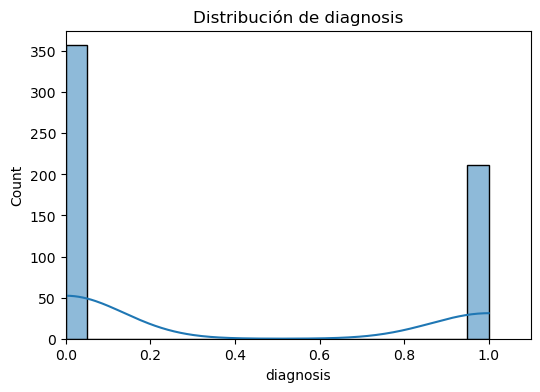

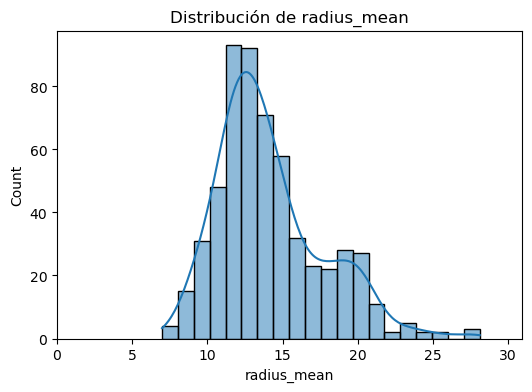

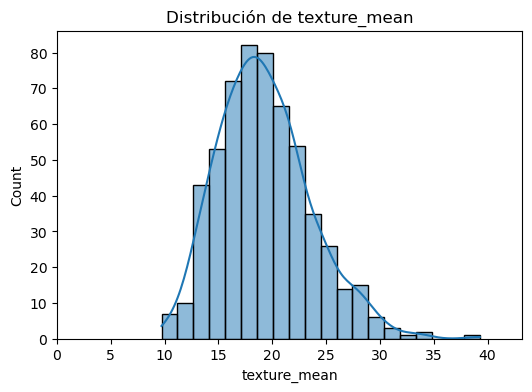

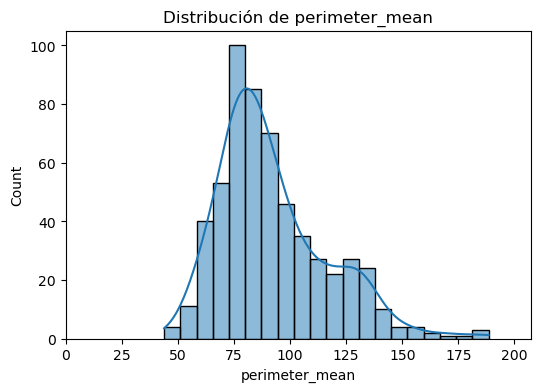

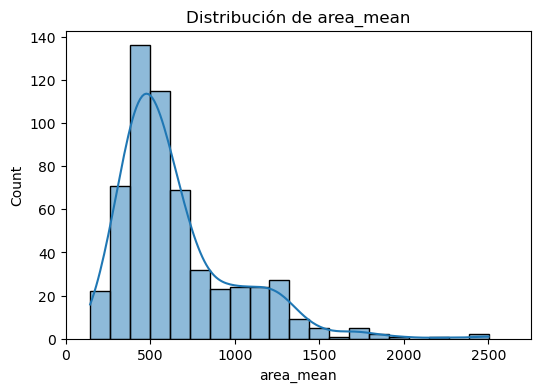

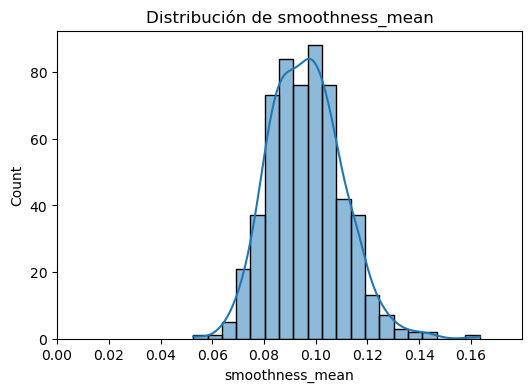

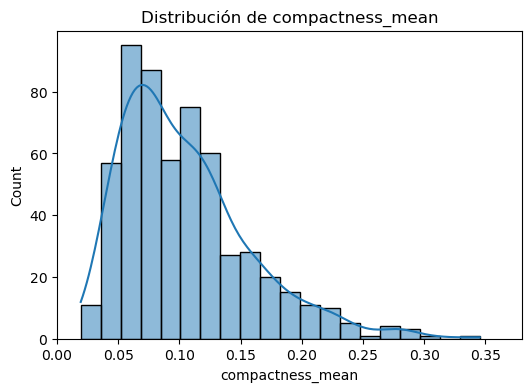

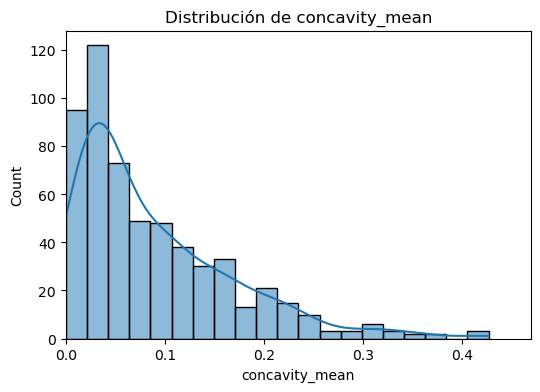

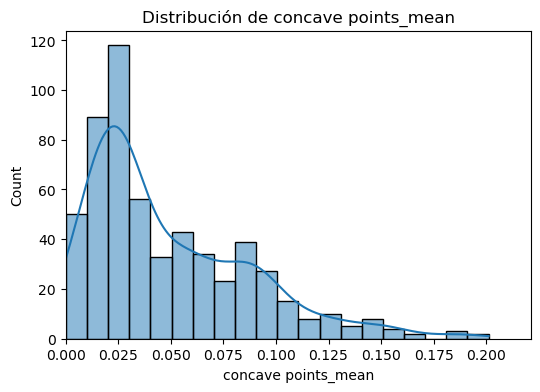

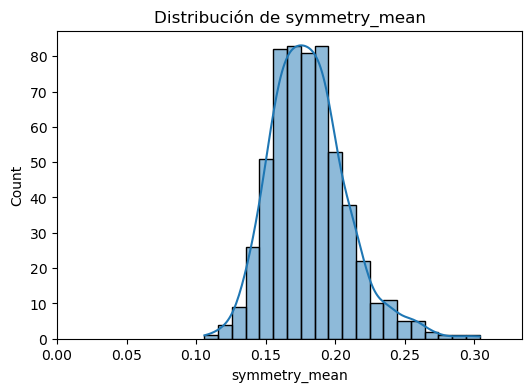

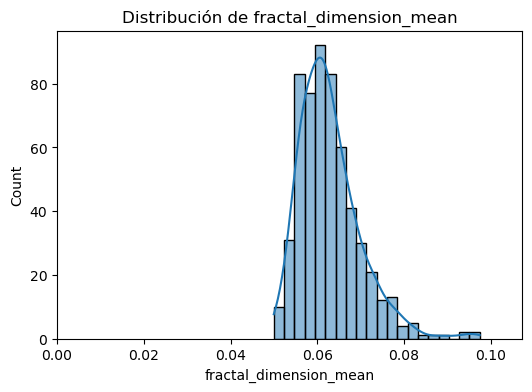

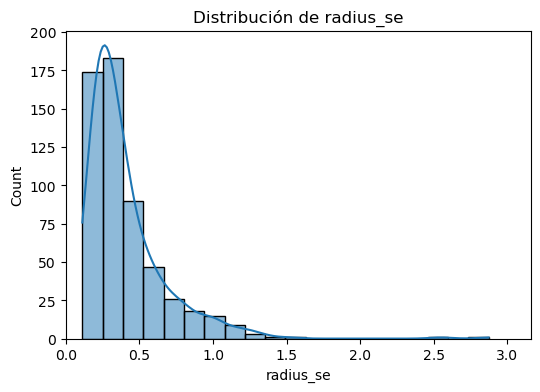

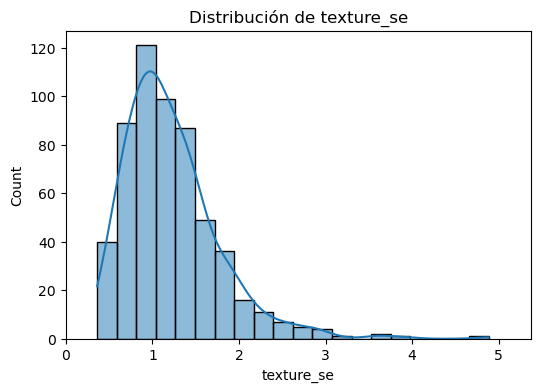

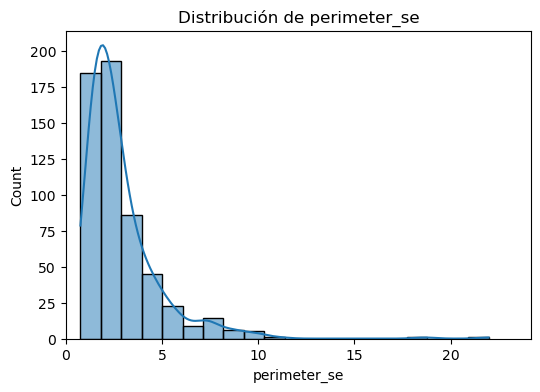

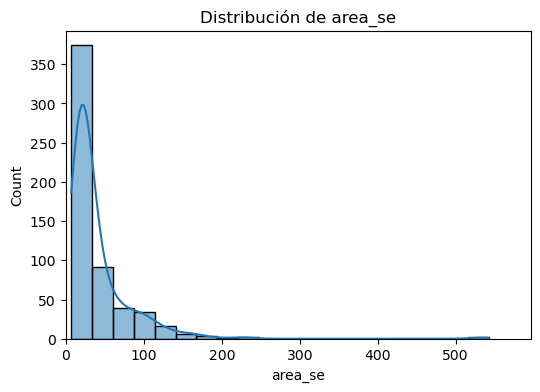

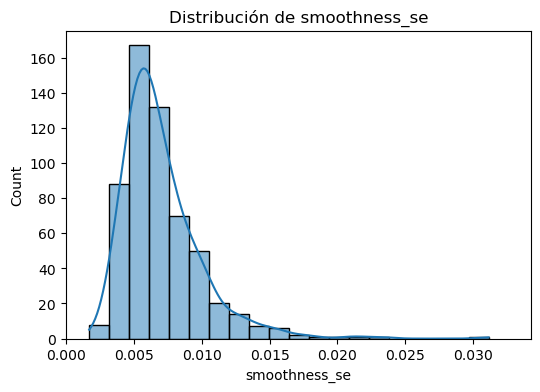

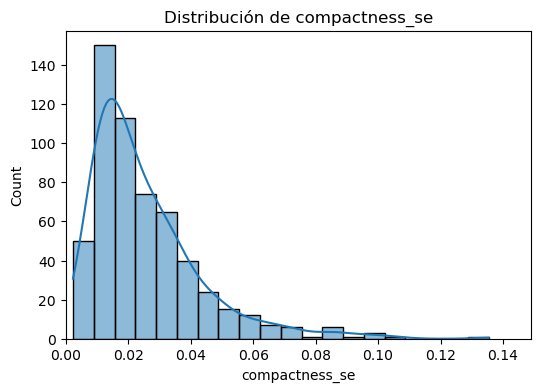

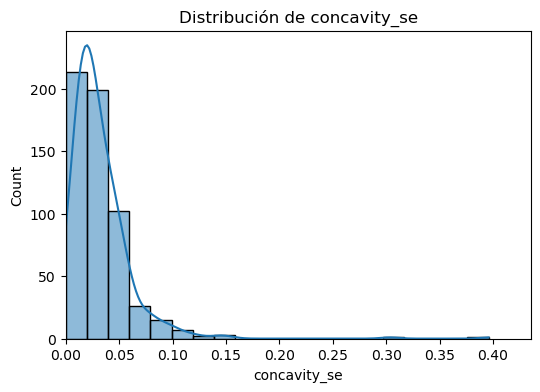

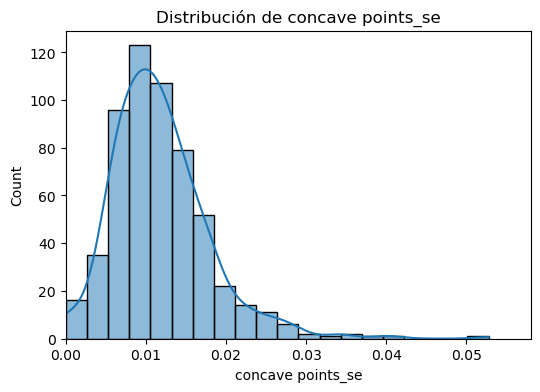

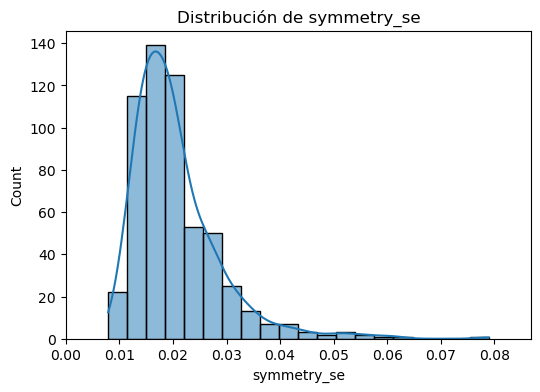

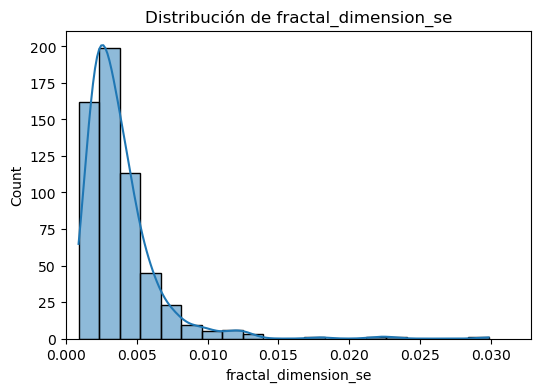

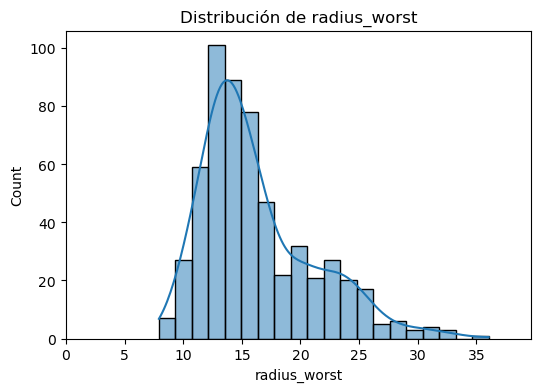

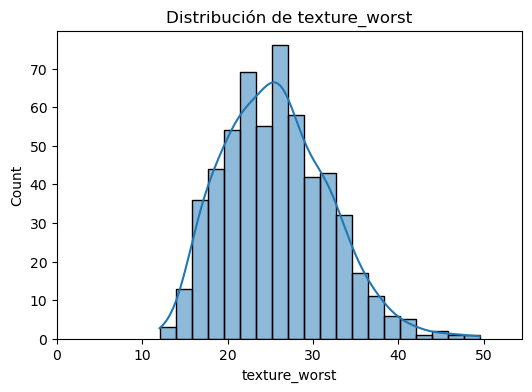

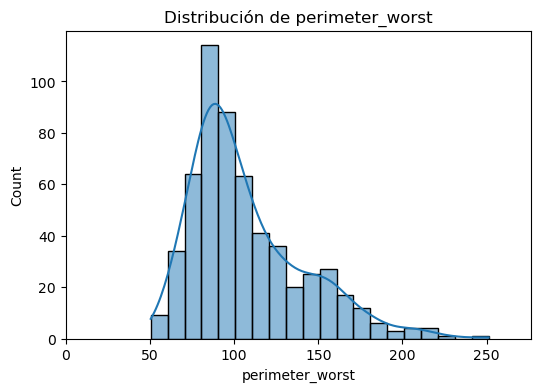

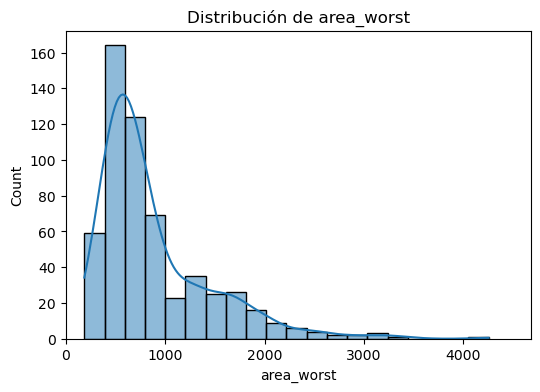

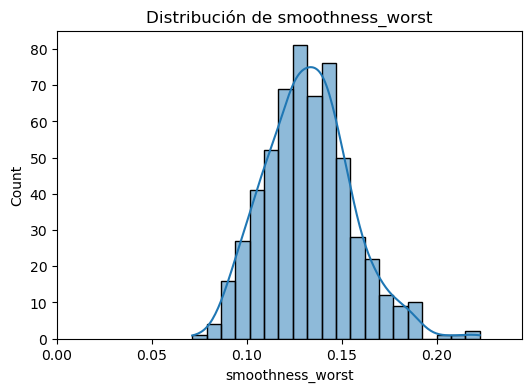

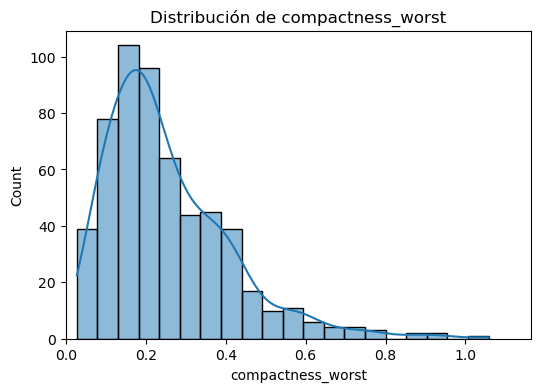

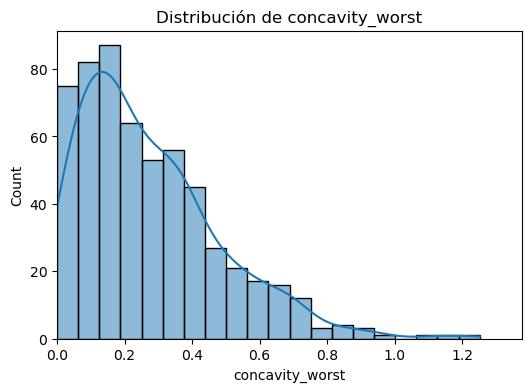

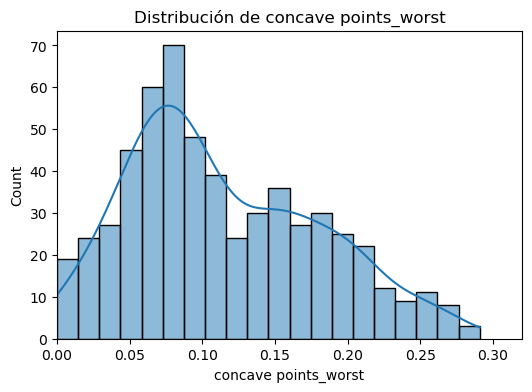

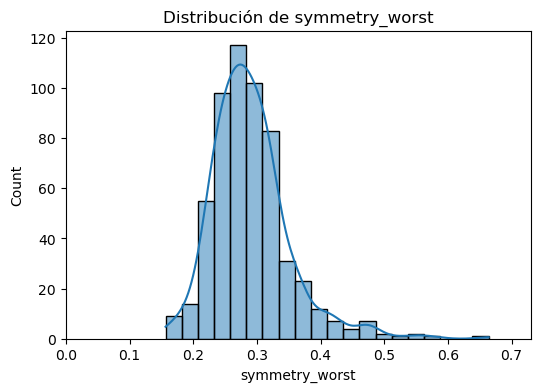

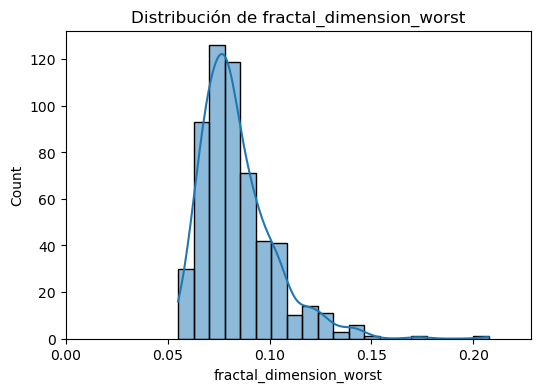

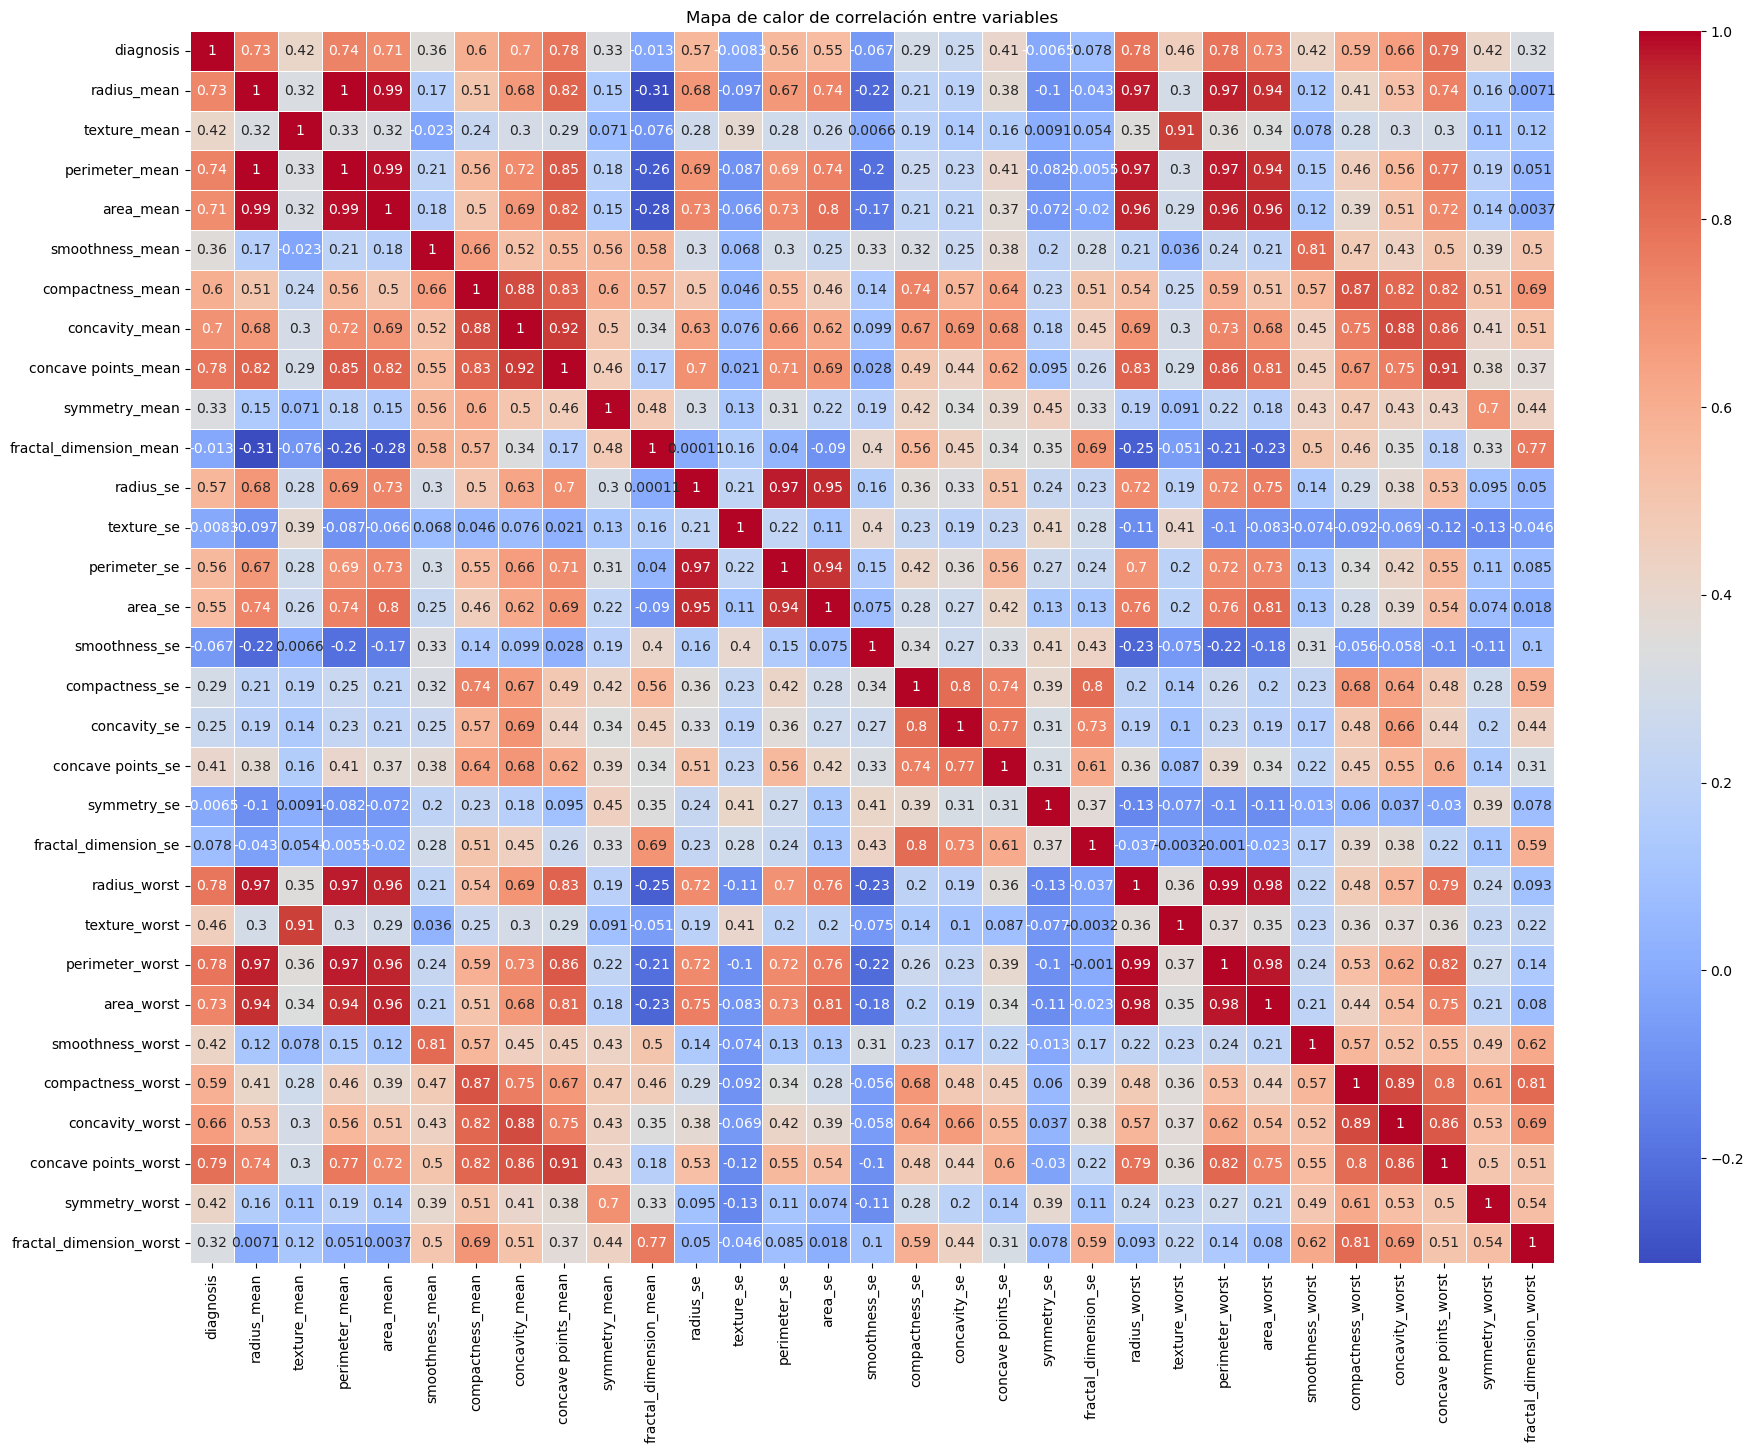

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# 1. Cargar el archivo CSV
pd.set_option('display.width', 1000)
dataframe = pd.read_csv('breast-cancer.csv')
print("Datos iniciales:")
print(dataframe.head())  # Muestra los primeros registros para una vista rápida de cómo están estructurados los datos.

# 2. Exploración inicial del conjunto de datos
print("\nInformación general del conjunto de datos:")
print(dataframe.info())  # Muestra información general del conjunto de datos.

# Valores únicos por columna para identificar posibles problemas
print("\nValores únicos por columna:")
print(dataframe.nunique())  # Muestra la cantidad de valores únicos por columna.

# 3. Revisión y manejo de valores nulos
print("\nValores nulos por columna:")
print(dataframe.isnull().sum())  # Muestra la cantidad de valores nulos por columna.

# Eliminar columna id para evitar ruido en el análisis
dataframe = dataframe.drop(columns=['id'])
print("\nDescripción estadística básica:")
print(dataframe.describe())  # Muestra estadísticas generales del conjunto de datos.

# Modificar columna diagnosis para que sea binaria (Maligno=1, Benigno=0)
dataframe['diagnosis'] = dataframe['diagnosis'].map({'M': 1, 'B': 0})
print("\nDescripción estadística básica después de modificar diagnosis:")
print(dataframe.describe())

# 4. Exploración detallada de características
print("\nVisualización de distribuciones individuales de las características:")
for column in dataframe.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataframe[column].dropna(), kde=True, bins=20)  # Un histograma con KDE para visualizar la forma de la distribución.
    plt.title(f'Distribución de {column}')
    plt.xlim(0, dataframe[column].max() * 1.1)  # Ajustar límites del eje X para ver mejor la distribución completa.
    plt.show()

# Mapa de calor de correlación entre variables
# Visualizamos la correlación entre las variables para detectar relaciones importantes entre las características.
plt.figure(figsize=(22, 16))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', linewidths=0.5)  # Se destaca con anotaciones el valor de la correlación.
plt.title('Mapa de calor de correlación entre variables')
plt.show()

### **Modelo y evaluación**